In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def solver(conds,dims):
  # Definir la malla
  nx = 50 # Número de puntos en la dirección x
  ny = 50 # Número de puntos en la dirección y
  a, b = dims # Dimensiones del rectángulo
  x = np.linspace(0, a, nx)
  y = np.linspace(0, b, ny)
  X, Y = np.meshgrid(x, y)

  # Definir las condiciones de frontera
  phi = np.zeros((ny, nx))
  phi[:, -1] = conds[':,-1'] # Condición de frontera en x=a
  phi[:,0] = conds[':,0']
  phi[0,:] = conds['0,:']
  phi[-1,:] = conds['-1,:']
  # Definir el método de diferencias finitas
  dx = a/(nx-1)
  dy = b/(ny-1)
  error = 1e-4 # Criterio de convergencia
  max_iter = 1000 # Máximo número de iteraciones

  # Realizar el método de diferencias finitas
  for k in range(max_iter):
      # Guardar la solución anterior
      phi_old = phi.copy()

      # Actualizar la solución
      for i in range(1, ny-1):
          for j in range(1, nx-1):
              phi[i, j] = (1/4)*(phi[i+1, j]+phi[i-1, j]+phi[i, j+1]+phi[i, j-1])

  return X,Y,phi

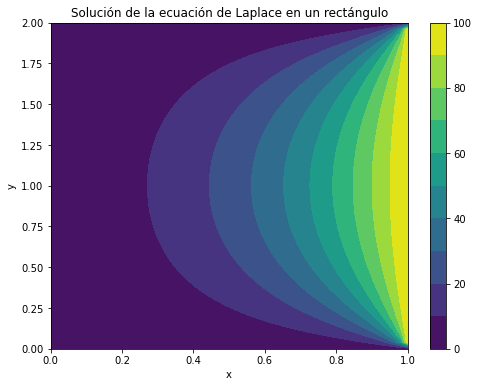

In [3]:
conds = {':,-1':100,
         ':,0':0,
         '0,:':0,
         '-1,:':0}

init_conds = np.random.rand(int(np.round(1/h)), int(np.round(2/h)))

X,Y,phi = solver(conds,(1,2))

# Graficar la solución
# create a figure and axes
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1) 

ax.set_xlabel('x')
ax.set_ylabel('y')

cont = ax.contourf(X, Y, phi, levels=np.linspace(0,100,11))
cbar = plt.colorbar(cont)

ax.set_title('Solución de la ecuación de Laplace en un rectángulo')
plt.show()


In [4]:
# animation function. This is called sequentially
def drawframe(n):
  conds = {':,-1':0,
        ':,0':0,
        '0,:':0,
        '-1,:':0}

  conds[':,-1'] = 4*np.exp(n*0.1)

  X,Y,phi = solver(conds,(1,2))
  ax.clear
  ax.contourf(X, Y, phi, levels=np.linspace(0,100,11))

In [5]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=20, interval=20, blit=False)

writergif = animation.PillowWriter(fps=30)
anim.save('anim.gif', writer=writergif)

4.0
10.87312731383618
29.5562243957226
80.34214769275067
218.39260013257694
593.6526364103064
1613.7151739709404
4386.532633713834


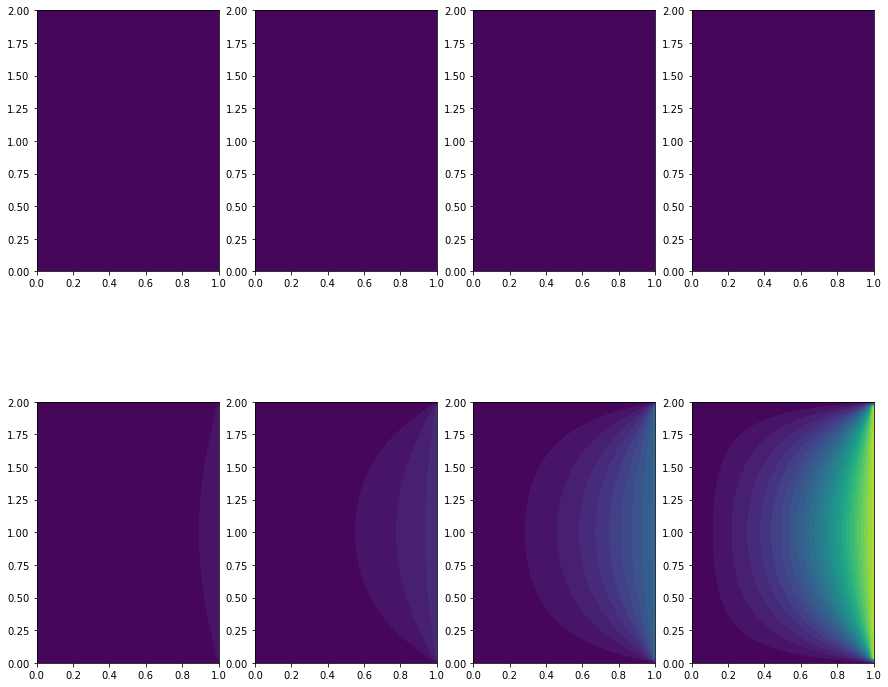

In [6]:
# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("_", fontsize=18, y=0.95)

axs = axs.ravel()

n = 0
for i in range(0,80,10):
  conds = {':,-1':0,
           ':,0' :0,
           '0,:' :0,
           '-1,:':0}

  conds[':,-1'] = 4*np.exp(i*0.1)
  print(conds[':,-1'])

  X,Y,phi = solver(conds,(1,2))
  axs[n].contourf(X, Y, phi, levels=np.linspace(0,5000,30))

  n+=1
  

4300


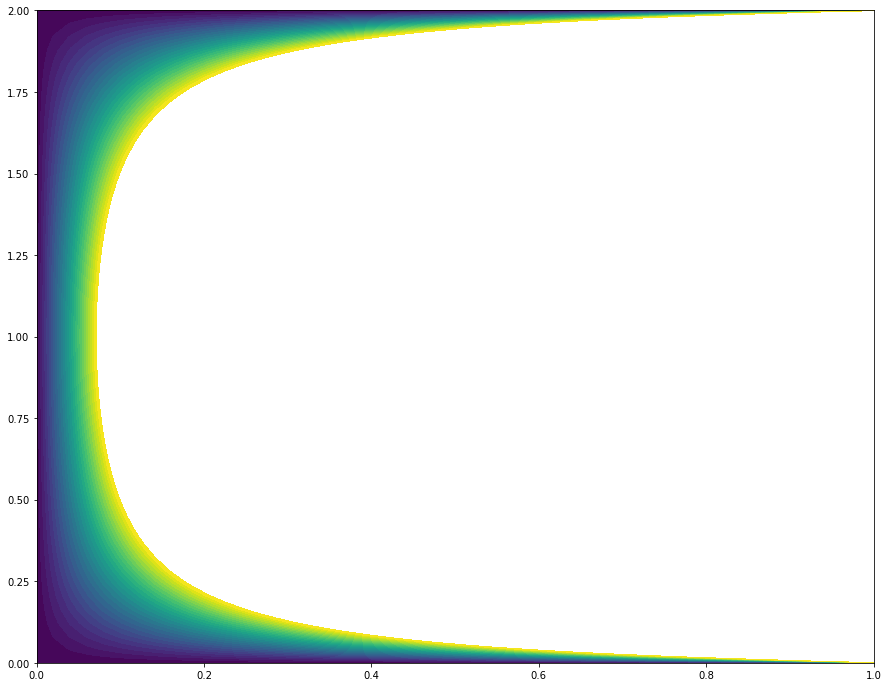

In [7]:
# define subplot grid
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("_", fontsize=18, y=0.95)


conds = {':,-1':0,
           ':,0' :0,
           '0,:' :0,
           '-1,:':0}

conds[':,-1'] = 4300
print(conds[':,-1'])

X,Y,phi = solver(conds,(1,2))
axs.contourf(X, Y, phi, levels=np.linspace(0,100,30))